<a href="https://colab.research.google.com/github/EteimZ/Deep_Learning-Notebooks/blob/main/Pytorch/feed_forward_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed forward neural network

In this notebook, I will be training a neural network to classify digits using pytorch. The neural network architecture used is a feed forward neural network.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Setting up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Setting up the Hyper-parameters

* Input size: This is 784 because the Mnist data have 28X28 pixels.
* Hidden size: 512, arbitrary value
* Number of classes: 10(digits 0 through 9)
* Number of epochs: 5, Number of passes through the network.
* Batch size: 100, Number of samples in one epoch.
* learning rate: 0.01

In [ ]:
input_size = 784 # 28x28
hidden_size = 512
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.01

## Getting Data

The Mnist dataset is gotten from the torchvision package. 

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Loading Datasets:

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Iterating over the Data:


In [ ]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

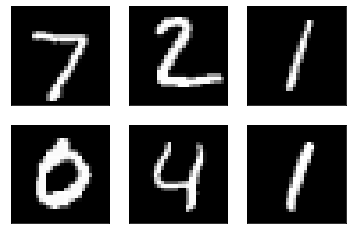

In [ ]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

## Model

The network is a fully connected neural network with one hidden layer:

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
       
        return out

Define the model:

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Setting up loss and optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Training & Testing

Training the model:

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.1869
Epoch [1/5], Step [200/600], Loss: 0.1467
Epoch [1/5], Step [300/600], Loss: 0.1611
Epoch [1/5], Step [400/600], Loss: 0.1670
Epoch [1/5], Step [500/600], Loss: 0.0913
Epoch [1/5], Step [600/600], Loss: 0.1833
Epoch [2/5], Step [100/600], Loss: 0.1350
Epoch [2/5], Step [200/600], Loss: 0.1698
Epoch [2/5], Step [300/600], Loss: 0.0263
Epoch [2/5], Step [400/600], Loss: 0.1016
Epoch [2/5], Step [500/600], Loss: 0.1587
Epoch [2/5], Step [600/600], Loss: 0.0610
Epoch [3/5], Step [100/600], Loss: 0.0598
Epoch [3/5], Step [200/600], Loss: 0.0531
Epoch [3/5], Step [300/600], Loss: 0.0681
Epoch [3/5], Step [400/600], Loss: 0.1278
Epoch [3/5], Step [500/600], Loss: 0.0946
Epoch [3/5], Step [600/600], Loss: 0.1469
Epoch [4/5], Step [100/600], Loss: 0.0778
Epoch [4/5], Step [200/600], Loss: 0.0601
Epoch [4/5], Step [300/600], Loss: 0.0902
Epoch [4/5], Step [400/600], Loss: 0.0759
Epoch [4/5], Step [500/600], Loss: 0.0435
Epoch [4/5], Step [600/600], Loss:

Test the model:

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.04 %


We have tested our Model, now lets take in one image at a time instead of using batches.

In [ ]:
import random

rand_num = random.randint(0, len(example_data))

#Picking a random test image
img = example_data[rand_num]
label_img = example_targets[rand_num]
img = img.reshape(-1, 28*28).to(device)

with torch.no_grad():
  output = model(img)
  _, pred = torch.max(output, 1)
  print(f'predicted value: {pred.item()}, label: {label_img.item()}')

predicted value: 3, label: 3
